<a href="https://colab.research.google.com/github/qudseen/cs666student/blob/main/Copy_of_CS666_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

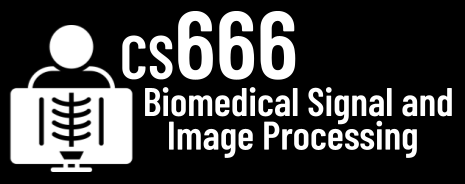
# Assignment 7

In [ ]:
# NAME: Qudseen 

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute.

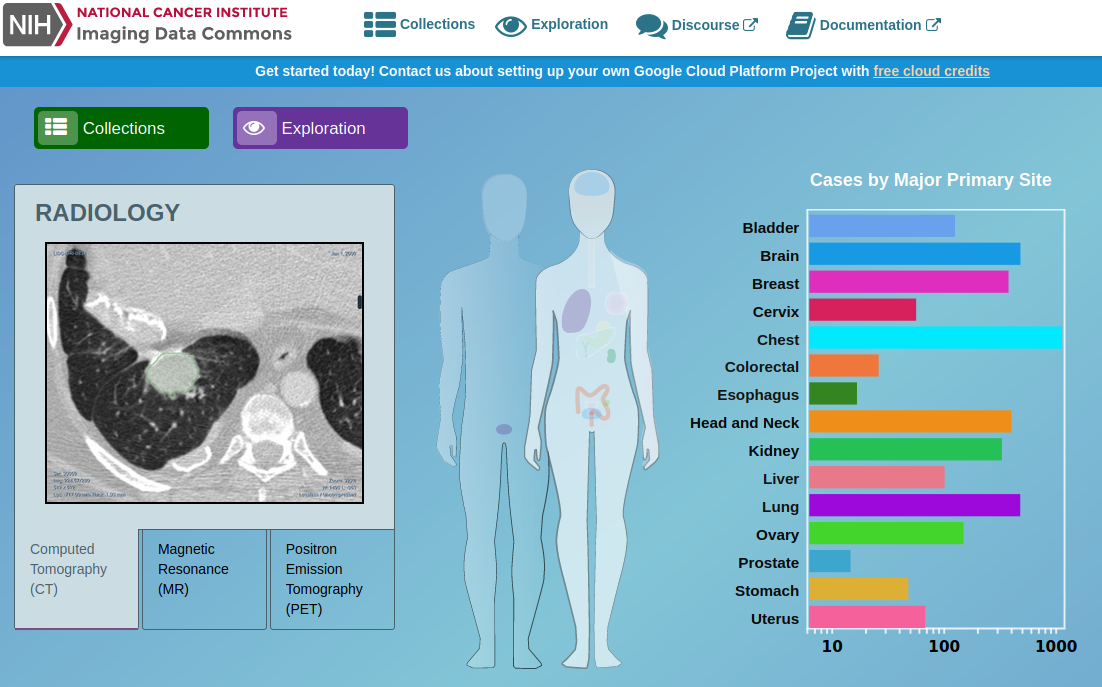

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [10 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [ ]:
#
# TODO: https://viewer.imaging.datacommons.cancer.gov/viewer/1.3.6.1.4.1.14519.5.2.1.7009.2403.211509663482222942586404432626
#

In [ ]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

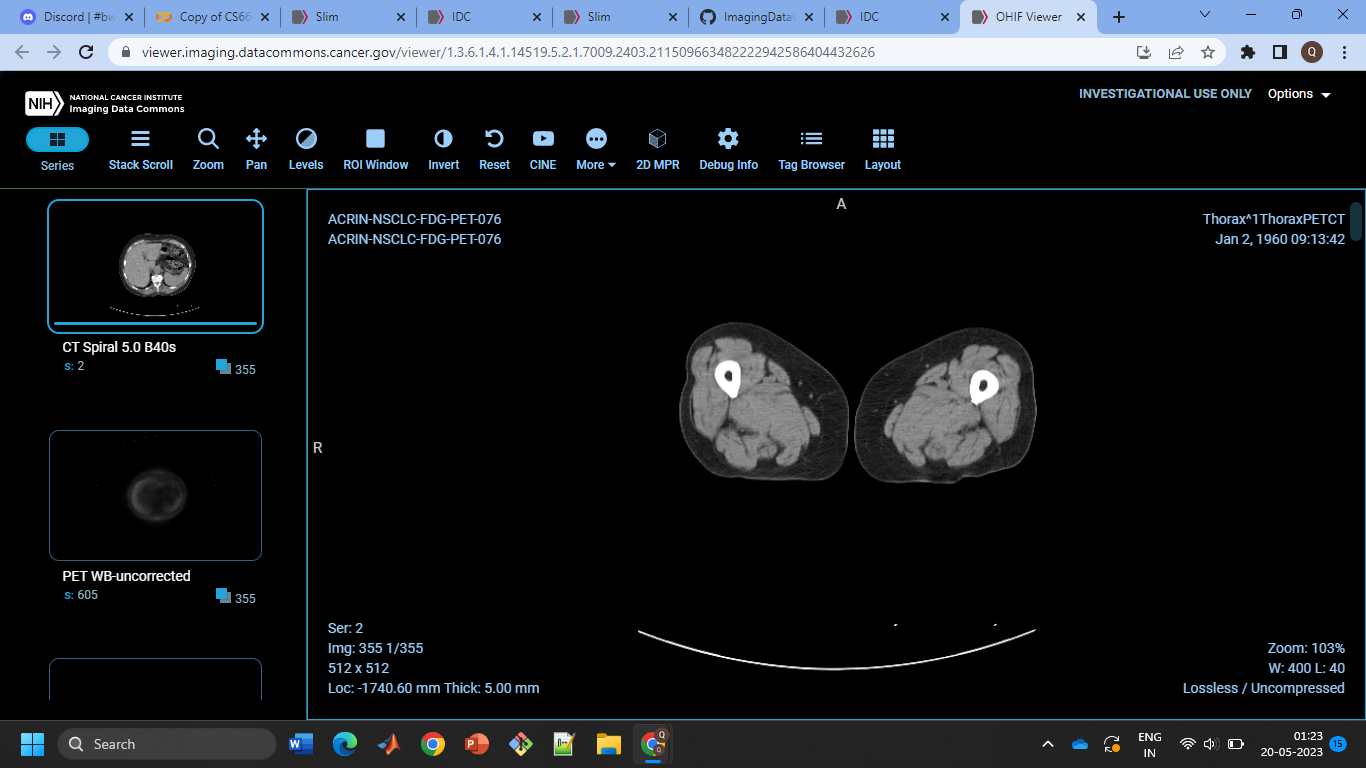TODO: Add screenshot of the viewer.

**Task 2**: Visualize structural and PET side-by-side! [20 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

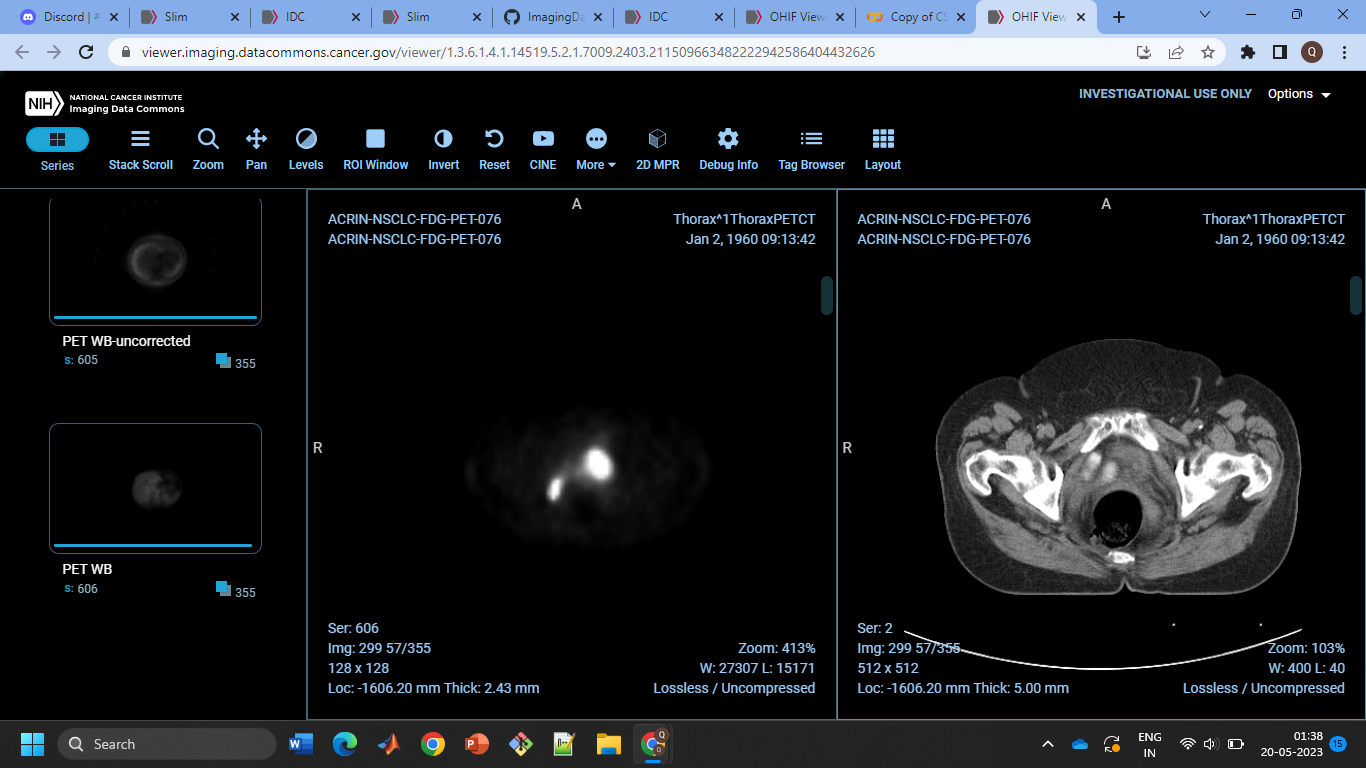TODO: Add your screenshot showing the cancerous lesion and structural scan side-by-side.

**Task 3**: Let's access the pixel data! [20 Points]

In [ ]:
#
# IMPORTANT: SWITCH BACK TO THE STANDARD LAYOUT (1-column) or RELOAD THE PAGE.
#
# AND: Visualize the CT/MRI scan rather than the PET scan for this task.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
#   element = cornerstone.getEnabledElements()[0];
#   pixels = element.image.getPixelData();
#

In [ ]:
# 3): What is the minimum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
#
#
 pixels.sort((a,b) => a-b) // Sort numerically, ascending
const min = pixels[0]
console.log(`Minimum: ${min}`) 
#
#

In [ ]:
# TODO:0

**Task 4**: Let's apply a 3x3 filter mask! [30 Points]

In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Sobel, Gaussian blur, edge detection..).
#
# After setting new pixel values, you can re-draw/re-render the current slice with this command:
#
#   cornerstone.renderGrayscaleImage(element, true);
#

In [ ]:
#
#
# TODO: 
  function kernel(width, height, centerX, centerY) {
	this.width = width;
	this.height = height;
	this.centerX = centerX || Math.floor(width / 2);
	this.centerY = centerY || Math.floor(height / 2);
	this.weights = [];
	for (var h = 0; h < height; ++h) {
		this.weights.push([]);
		for (var w = 0; w < width; ++w) {
			this.weights[h].push(0);
		}
	}
}

var sobel_x = new kernel(3, 3);
sobel_x.weights = [
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]
];

var sobel_y = new kernel(3, 3);
sobel_y.weights = [
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]
];

var getPix = function(x, y) {
	x = Math.max(0, Math.min(x, width - 1));
	y = Math.max(0, Math.min(y, height - 1));
	var address = (y * width + x) * 4;
	return [pixels[address + 0], pixels[address + 1], pixels[address + 2], pixels[address + 3]];
};

var getFilteredPix = function(x, y, kernelFilter) {
	var retVal = [0, 0, 0, 0];
	for (var fy = 0; fy < kernelFilter.height; ++fy) {
		for (var fx = 0; fx < kernelFilter.width; ++fx) {
			var m = kernelFilter.weights[fy][fx];
			var pix = getPix(x + fx - kernelFilter.centerX, y + fy - kernelFilter.centerY);
			retVal[0] += pix[0] * m;
			retVal[1] += pix[1] * m;
			retVal[2] += pix[2] * m;
			retVal[3] += pix[3];
		}
	}
	return retVal;
};

var resultPixelData = new Int16Array(pixels.length);

for (var yp = 0; yp < height; ++yp) {
	for (var xp = 0; xp < width; ++xp) {
		var pixel_x = getFilteredPix(xp, yp, sobel_x);
		var pixel_y = getFilteredPix(xp, yp, sobel_y);
		var val = Math.sqrt(pixel_x[0] * pixel_x[0] + pixel_y[0] * pixel_y[0]);
		val = Math.ceil(val);
		var address = (yp * width + xp) * 4;
		resultPixelData[address + 0] = val;
		resultPixelData[address + 1] = val;
		resultPixelData[address + 2] = val;
		resultPixelData[address + 3] = 255;
	}
}

pixels.set(resultPixelData);
cornerstone.renderGrayscaleImage(element, true);
#
#

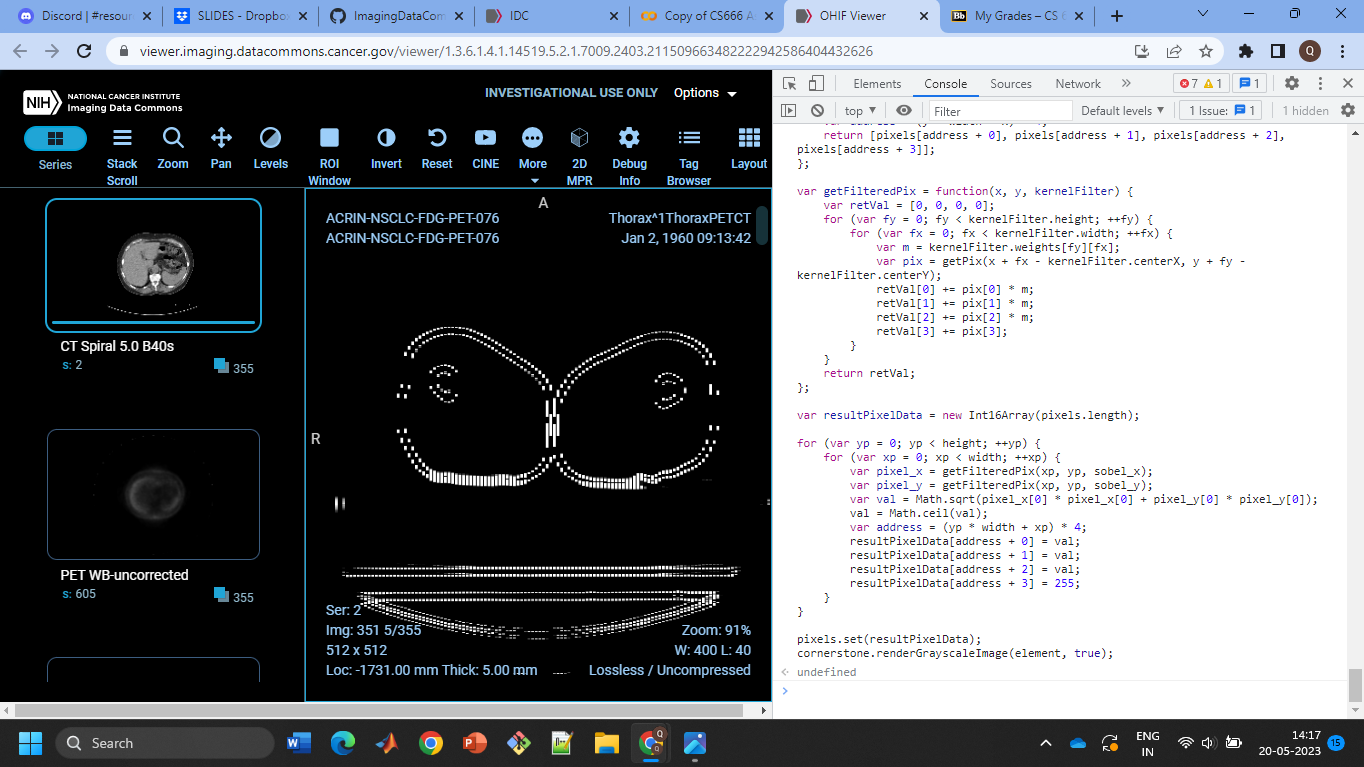TODO: Add Screenshot of the filtered slice.

**Task 5**: Use the Segment Anything model to annotate the scan. [20 Points]

In [ ]:
#
# Now we will use the bookmarklet to run Meta's Segment Anything model on the data.
#
# 1) Visit https://cs666.org/sam/ and install the bookmarklet.
#
# 2) Run the model on a structure of your choice.
#    HINT: The video shows how to do it https://www.youtube.com/watch?v=2kxrqQfjsQw
#
# 3) Take a screenshot of the result.
#

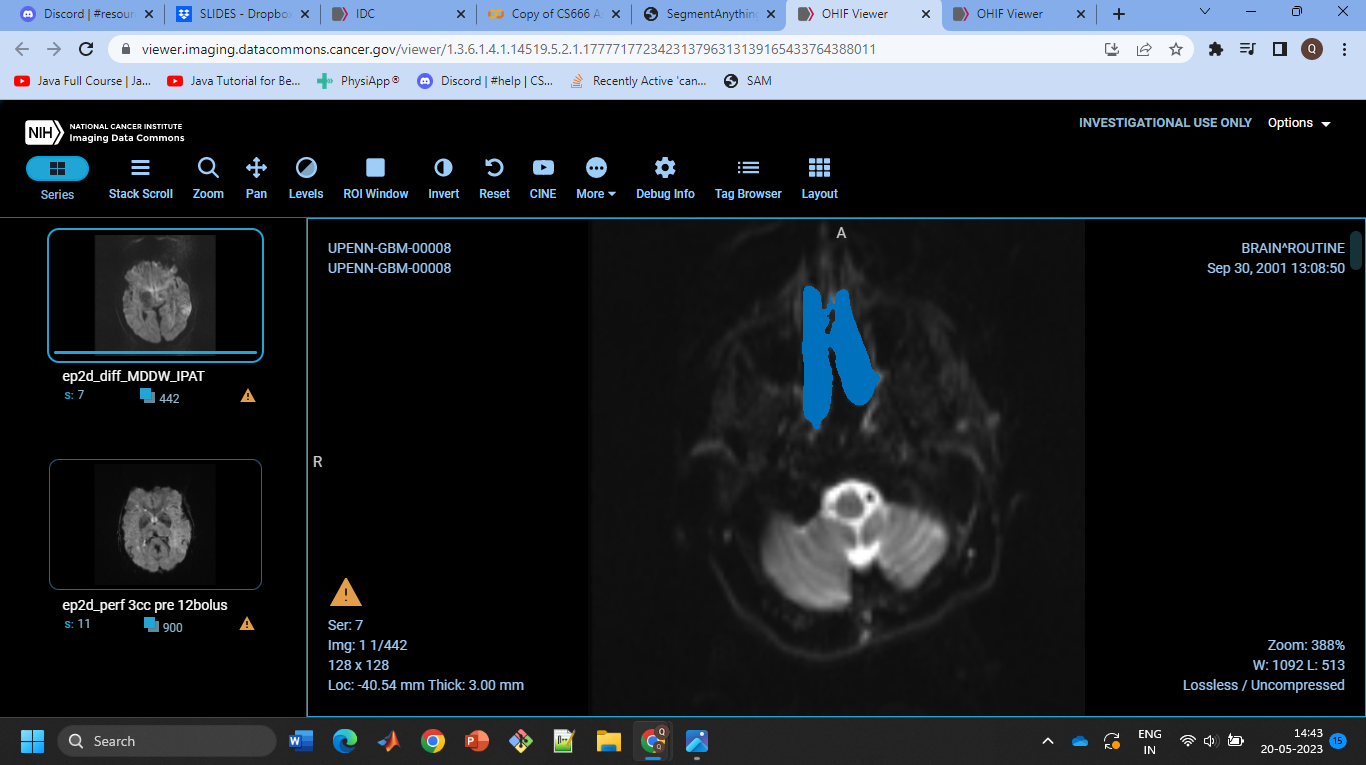TODO: Add Screenshot of the segmented slice.

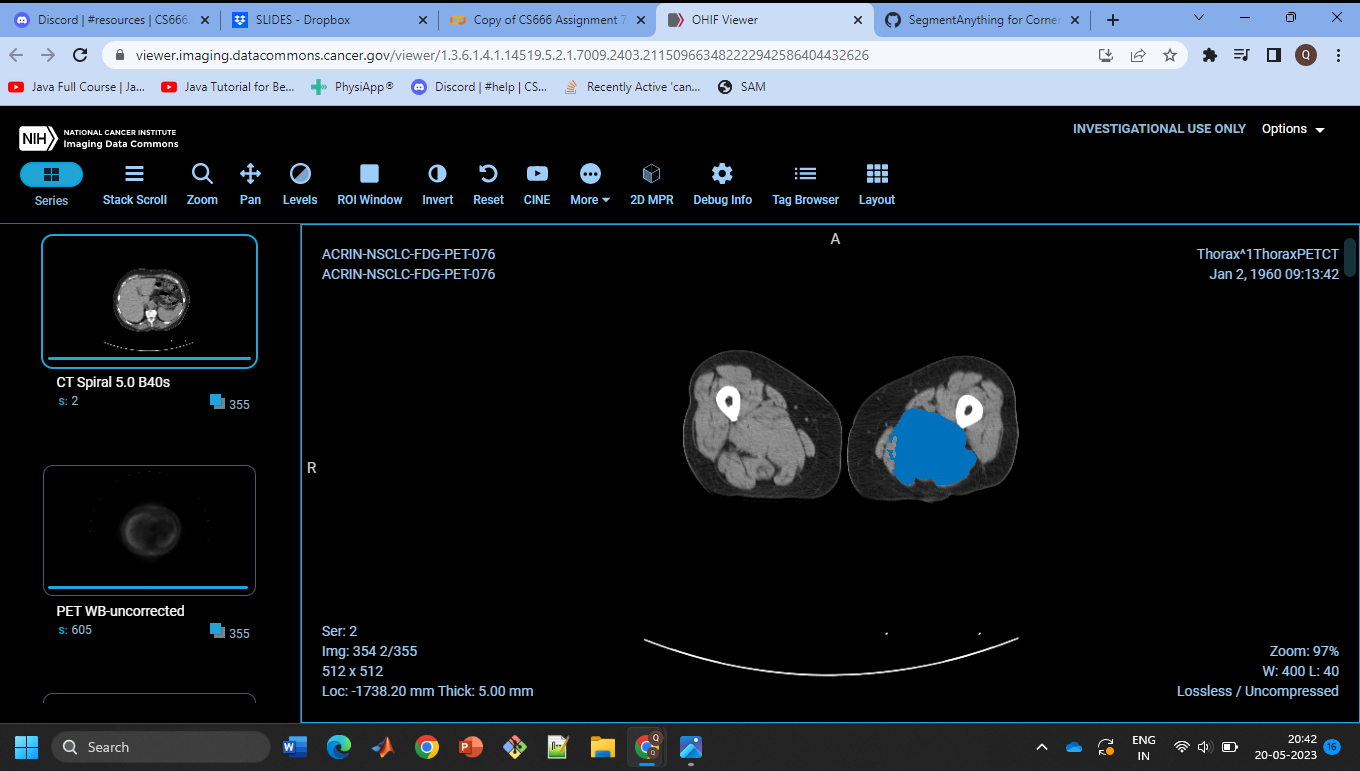

In [ ]:
#
# 4) Now, please study the code of the bookmarklet.
#    See https://gist.github.com/haehn/bbec8cf8442adea5bb10c08d9c3cc13f
#
#    TODO:  Bookmarklet uses the Canvas to directly access and manipulate pixel data while masking is done by  done by iterating over each pixel in the image and applying the mask to determine the resulting pixel value.
#

**Bonus 1**: Create a Segment Anything bookmarklet for NiiVue.js-based installations. [33 Points]

In [ ]:
#
# Similar to the code from Task 5, please create a bookmarklet (JS injection) 
# for a NiiVue.js-based visualization such as: https://mpsych.github.io/CACTAS/
#
# HINT: nv.drawSelectionBox([x,y,w,h]) draws a selection box and here is a related
#       github issue: https://github.com/niivue/niivue/issues/596
#
# HINT2: You will want to hide the blue orientation lines before grabbing the
#        canvas pixels.
#          nv.setCrosshairColor([0, 0, 0, 0]);
#          nv.opts.crosshairWidth = 0.;
#          nv.updateGLVolume();
#
# HINT3: The CACTAS repo has a lot of useful NiiVue.js code snippets
#        https://github.com/mpsych/cactas
#

**Bonus 2**: Plugin your NiiVue.js bookmarklet on OpenNeuro.org. [Summer Job]

In [ ]:
#
# Integrate the Segment Anything bookmarklet with OpenNeuro.org, for example here:
# https://openneuro.org/datasets/ds004513/versions/1.0.2/file-display/sub-s033:ses-open:anat:sub-s033_ses-open_T1w.nii.gz
#
# And here is a related Github issue: https://github.com/OpenNeuroOrg/openneuro/issues/2815
#
# STRETCH GOALS TO STRENGTHEN YOUR APPLICATION:
#  1. Run on pixel data rather than canvas imagedata.
#  2. Run in 3D!
#

In [ ]:
# references: https://blog.j2i.net/2017/11/25/kernel-filters-in-htmljavascript/

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#